In [1]:
#Loading the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import re
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.stem import PorterStemmer,WordNetLemmatizer
from nltk.tag import pos_tag
from nltk.corpus import stopwords
from nltk import chunk
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

In [2]:
#Reading the dataset
data=pd.read_csv("train.csv")

# Analysis

In [3]:
data.head()

,name,gender
0,Mary,F
1,Anna,F
2,Emma,F
3,Elizabeth,F
4,Minnie,F


In [4]:
#Chwcking the shape of our dataset
data.shape 

(60000, 2)

In [5]:
# Checking for the null values
data.isnull().sum()

name      0
gender    0
dtype: int64

In [6]:
# Checking for bias classification
data["gender"].value_counts()

F    39445
M    20555
Name: gender, dtype: int64

In [7]:
#Checking for the diplicated entries
data.duplicated().sum()

0

In [8]:
# Getting the male and female counts
F_count,M_count=data["gender"].value_counts()

In [9]:
F_count

39445

In [10]:
M_count

20555

In [11]:
#Converting the names into Lower case
data["name"]=data["name"].str.lower()

In [12]:
data.head()

,name,gender
0,mary,F
1,anna,F
2,emma,F
3,elizabeth,F
4,minnie,F


In [13]:
#Checking for the max length of the name in our names
len(data["name"].max())

7

In [14]:
#Checking for the min length of the name in our names
len(data["name"].min())

5

In [15]:
# Expanding names into separate catageries so that our model should learn nicely
expanded=[]
for i in data["name"]:

    expanded.append(i[0]+" "+i[:2]+" "+i[:3]+" "+i[-1]+" "+i[-3:]+" "+i[-2:])

In [16]:
expanded

['m ma mar y ary ry',
 'a an ann a nna na',
 'e em emm a mma ma',
 'e el eli h eth th',
 'm mi min e nie ie',
 'm ma mar t ret et',
 'i id ida a ida da',
 'a al ali e ice ce',
 'b be ber a tha ha',
 's sa sar h rah ah',
 'a an ann e nie ie',
 'c cl cla a ara ra',
 'e el ell a lla la',
 'f fl flo e nce ce',
 'c co cor a ora ra',
 'm ma mar a tha ha',
 'l la lau a ura ra',
 'n ne nel e lie ie',
 'g gr gra e ace ce',
 'c ca car e rie ie',
 'm ma mau e ude de',
 'm ma mab l bel el',
 'b be bes e sie ie',
 'j je jen e nie ie',
 'g ge ger e ude de',
 'j ju jul a lia ia',
 'h ha hat e tie ie',
 'e ed edi h ith th',
 'm ma mat e tie ie',
 'r ro ros e ose se',
 'c ca cat e ine ne',
 'l li lil n ian an',
 'a ad ada a ada da',
 'l li lil e lie ie',
 'h he hel n len en',
 'j je jes e sie ie',
 'l lo lou e ise se',
 'e et eth l hel el',
 'l lu lul a ula la',
 'm my myr e tle le',
 'e ev eva a eva va',
 'f fr fra s ces es',
 'l le len a ena na',
 'l lu luc y ucy cy',
 'e ed edn a dna na',
 'm ma mag

In [17]:
data["expanded"]=pd.DataFrame(expanded)

In [18]:
data.head()

,name,gender,expanded
0,mary,F,m ma mar y ary ry
1,anna,F,a an ann a nna na
2,emma,F,e em emm a mma ma
3,elizabeth,F,e el eli h eth th
4,minnie,F,m mi min e nie ie


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 3 columns):
name        60000 non-null object
gender      60000 non-null object
expanded    60000 non-null object
dtypes: object(3)
memory usage: 1.4+ MB


In [20]:
#Sepetrating male and female dtaset
F_data=data[data["gender"]=="F"]
M_data=data[data["gender"]=="M"]

In [21]:
#sampeling for balancing the data
sample1=F_data.sample(M_count,random_state=10)
sample2=M_data.sample(F_count,random_state=10,replace=True)

In [22]:
sample1.head(),sample2.head()

(             name gender           expanded
 32878      nkechi      F  n nk nke i chi hi
 13890      aleece      F  a al ale e ece ce
 39994      lakeva      F  l la lak a eva va
 20973  donnamaria      F  d do don a ria ia
 33936     marieke      F  m ma mar e eke ke,
           name gender           expanded
 52170  prateek      M  p pr pra k eek ek
 16641    welty      M  w we wel y lty ty
 52225  eliecer      M  e el eli r cer er
 16639   walley      M  w wa wal y ley ey
 24363     pepi      M  p pe pep i epi pi)

In [23]:
sample1["gender"].value_counts()

F    20555
Name: gender, dtype: int64

In [24]:
sample2["gender"].value_counts()

M    39445
Name: gender, dtype: int64

In [25]:
balanced_data1=pd.concat((M_data,sample1),axis=0)

In [26]:
#Converting female to 1 and male to 0
balanced_data1["gender"]=np.where(balanced_data1["gender"]=="F",1,0)

In [27]:
balanced_data1.head

<bound method NDFrame.head of           name  gender           expanded
942     edward       0  e ed edw d ard rd
943     albert       0  a al alb t ert rt
944     samuel       0  s sa sam l uel el
945      david       0  d da dav d vid id
946    charlie       0  c ch cha e lie ie
...        ...     ...                ...
12550  dorella       1  d do dor a lla la
6608    euline       1  e eu eul e ine ne
17330    ivone       1  i iv ivo e one ne
57516  elexius       1  e el ele s ius us
37537  kanetra       1  k ka kan a tra ra

[41110 rows x 3 columns]>

In [28]:
#Creating an Object of TfidfVectorizer
tfidf= TfidfVectorizer()

In [29]:
#transforming our expanded data to numeric using TfidfVectorizer()
x_tf = tfidf.fit_transform(balanced_data1["expanded"]).toarray()

In [30]:

from sklearn.model_selection import train_test_split

In [31]:
#Splitting the data
x_train,x_test,y_train,y_test=train_test_split(x_tf,balanced_data1["gender"],test_size=.20)

In [32]:
mn=MultinomialNB()

In [33]:
#fitting our data into MultinominalNB
mn.fit(x_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [53]:
#Prediction
train_predict=mn.predict(x_train)
predict=mn.predict(x_test)


In [35]:
from sklearn.metrics import accuracy_score,classification_report

In [55]:
# Computing Accuracy
print("Accuracy score:",accuracy_score(y_train,train_predict))
print("Accuracy score:",accuracy_score(y_test,predict))


Accuracy score: 0.8638105083921187
Accuracy score: 0.840306494770129


In [56]:
#Classification report
print("classification report:\n",classification_report(y_train,train_predict))
print("classification report:\n",classification_report(y_test,predict))

classification report:
               precision    recall  f1-score   support

           0       0.87      0.86      0.86     16426
           1       0.86      0.87      0.86     16462

    accuracy                           0.86     32888
   macro avg       0.86      0.86      0.86     32888
weighted avg       0.86      0.86      0.86     32888

classification report:
               precision    recall  f1-score   support

           0       0.85      0.83      0.84      4129
           1       0.83      0.85      0.84      4093

    accuracy                           0.84      8222
   macro avg       0.84      0.84      0.84      8222
weighted avg       0.84      0.84      0.84      8222



In [61]:
from sklearn.metrics import auc,roc_curve,confusion_matrix

In [59]:
#Computing TPR FPR values
FPR_train,TPR_train,_=roc_curve(y_train,train_predict)
FPR,TPR,_1=roc_curve(y_test,predict)

In [60]:
roc_auc=auc(FPR_train,TPR_train)
print("ROC AUC:%0.3f" % roc_auc)


roc_auc1=auc(FPR,TPR)
print("ROC AUC:%0.3f" % roc_auc1)

ROC AUC:0.864
ROC AUC:0.840


In [62]:
cm=confusion_matrix(y_test,predict)

In [64]:
cm=pd.DataFrame(cm)

In [65]:
cm

,0,1
0,3433,696
1,617,3476


In [66]:
import seaborn as sns

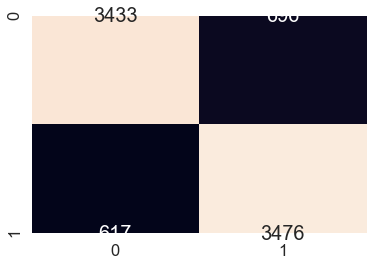

In [77]:
#Plotting the confusion matrix
sns.set(font_scale=1.5)
sns.heatmap(cm,annot=True,fmt="g",annot_kws={"size":20},cbar=False)

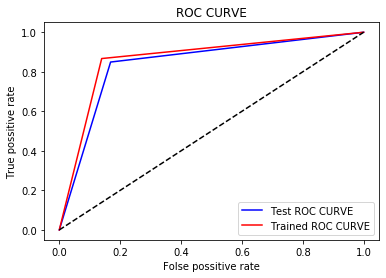

In [74]:
plt.plot(FPR,TPR,color="blue",label="Test ROC CURVE")
plt.plot(FPR_train,TPR_train,color="red",label="Trained ROC CURVE")
plt.plot([0,1],[0,1],"k--")
plt.xlabel("Folse possitive rate")
plt.ylabel("True possitive rate")
plt.title("ROC CURVE")
plt.legend(loc="lower right")
plt.show()

In [38]:
#Reading the data to which prediction has to be done
future_data=pd.read_csv("test.csv")

In [39]:
future_data.head()

,name
0,Maliq
1,Tyquez
2,Voshon
3,Adonys
4,Braison


In [40]:
future_data["name"]=future_data["name"].str.lower()

In [41]:
expanded_f=[]
for i in future_data["name"]:
    expanded_f.append(i[0]+" "+i[:2]+" "+i[:3]+" "+i[-1]+" "+i[-3:]+" "+i[-2:])
    

In [42]:
future_data["expanded"]=pd.DataFrame(expanded_f)

In [43]:
future_data.head()

,name,expanded
0,maliq,m ma mal q liq iq
1,tyquez,t ty tyq z uez ez
2,voshon,v vo vos n hon on
3,adonys,a ad ado s nys ys
4,braison,b br bra n son on


In [44]:
test_xtf=tfidf.transform(future_data["expanded"]).toarray()

In [45]:
test_xtf.shape

(35025, 4667)

In [46]:
#Prediction
gender=mn.predict(test_xtf)

In [47]:
gender

array([0, 0, 0, ..., 1, 0, 0])

In [48]:
pd.DataFrame(gender)[0].value_counts()

1    20851
0    14174
Name: 0, dtype: int64

In [49]:
gender=np.where(gender==1,"F","M")

In [50]:
future_data["gender"]=pd.DataFrame(gender)

In [51]:
future_data.head()

,name,expanded,gender
0,maliq,m ma mal q liq iq,M
1,tyquez,t ty tyq z uez ez,M
2,voshon,v vo vos n hon on,M
3,adonys,a ad ado s nys ys,M
4,braison,b br bra n son on,M


In [52]:
future_data["gender"].value_counts()

F    20851
M    14174
Name: gender, dtype: int64